<a href="https://colab.research.google.com/github/ddo2024/ggcolab/blob/main/S%26P_500_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the S&P 500 Industries
## By Duy Do

# Introduction:  
Question: How do sector classifications in the S&P 500 index influence stock price variations and overall financial performance (e.g., EBITDA)?
Is there at least one sector with different stock price mean?

Can we see whether a stock's price indicts a higher EBITDA (earnings before interest, taxes, depreciation, and amortization), which would mean higher profitability and increased revenue, subsequently benefiting stock holders?

#Data:
Total Observations: 494 stocks for ANOVA (464 for Correlation and Regression)

Features: Sector, EBITDA, Current stock price


   

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv'

sp500_df = pd.read_csv(data_url)

sp500_df.head()


#3 topics: ANOVA, correlation, regression: create pie chart on dif industries

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,155.74,2502866501632,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.072117
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,235.87,1770907107328,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.051026
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,96.58,1248045432832,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.035961
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,96.29,1248043597824,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.035961
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,103.41,1054957895680,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.030397


# Bar graph


<ipython-input-2-c8058a275846>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = sp500_df, x = "Sector", y = "Currentprice", ci = None).set(title = "Relation between sector and current price")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Communication Services'),
  Text(2, 0, 'Consumer Cyclical'),
  Text(3, 0, 'Financial Services'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Energy'),
  Text(6, 0, 'Consumer Defensive'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Basic Materials'),
  Text(9, 0, 'Industrials'),
  Text(10, 0, 'Real Estate')])

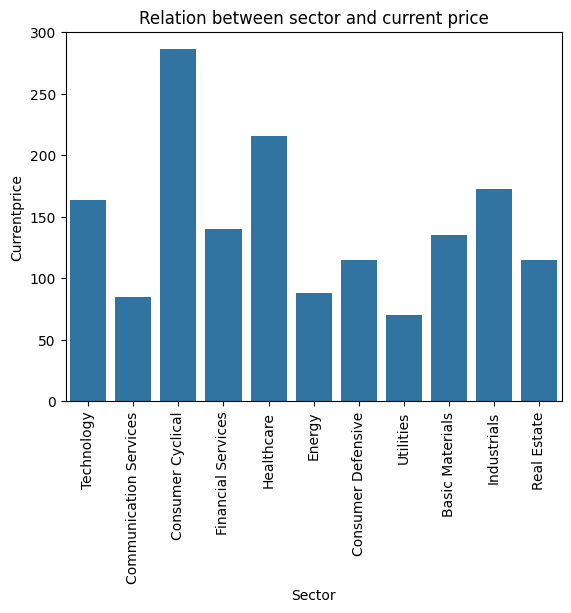

In [ ]:

sns.barplot(data = sp500_df, x = "Sector", y = "Currentprice", ci = None).set(title = "Relation between sector and current price")
plt.xticks(rotation = 90)



#Method 1: ANOVA test


Null hypothesis: there is no significant difference between the sector's means   
Alternative hypothesis: At least one sector's mean is significantly different

In [ ]:
# Extract sector names into a list
sector_list = []
for sector in sp500_df.Sector:
  if sector not in sector_list:
    sector_list.append(sector)


price_dict = {}
# Loop through each sector in the sector_list and initialize an empty list for each sector in the dictionary
for sector in sector_list:
    price_dict[sector] = []

# Loop through the rows of the sp500_df DataFrame
for i in range(len(sp500_df)):

    # Extract the sector and price information for the current row
    sector = sp500_df["Sector"][i]
    price = sp500_df["Currentprice"][i]

    # Append the price to the corresponding sector's list in price_dict
    price_dict[sector].append(price)


# This creates lists of prices for each sector
price_list = price_dict.values()

In [ ]:
k = len(sector_list)
N = 0
# count total values from all group
for ele in price_list:
  length = len(ele)
  N += length

df_between = k - 1
df_within = N - k
print(f"df_between: {df_between}")
print(f"df_within: {df_within}")


df_between: 10
df_within: 483


In [ ]:
from scipy.stats import f_oneway
# Perform one-way ANOVA on the price data grouped by sectors
F, p_value =  f_oneway(*price_list) # price_list as separate arguments
print(F)
print(p_value)

2.4869940346544337
0.006490550660555284



Alpha level = 0.05






In [ ]:
# numerator degrees of freedom is df_between = 10
# denominator degrees of freedom is df_within = 483
F_crit = 1.831

In [ ]:
if F > F_crit:
  print('Reject the null')
else:
  print('Retain the null')

Reject the null


# Conclusion
Since we reject the null in favor of the alternative, it means at least one sector has significantly different prices

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')


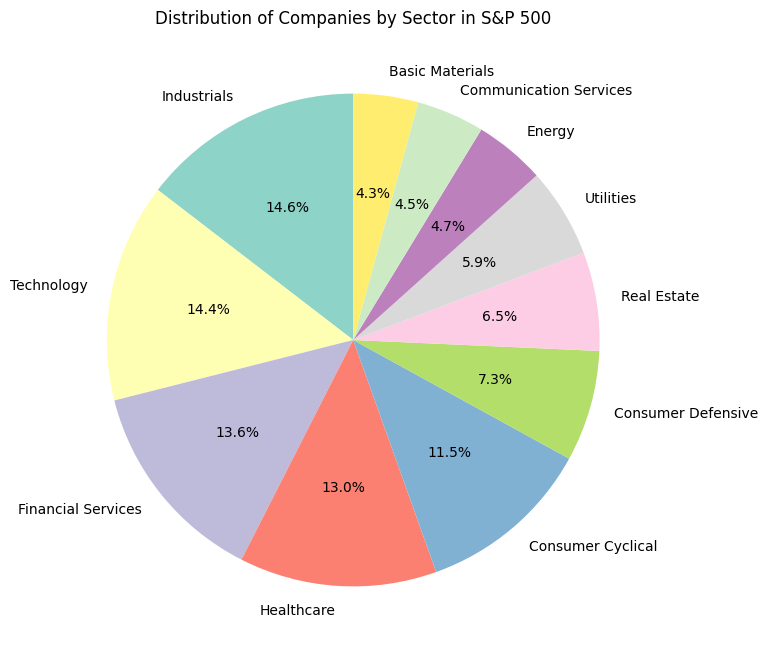

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data_url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv'
sp500_df = pd.read_csv(data_url)

# Check the column names to identify a categorical column like 'Sector'
print(sp500_df.columns)

# Assuming 'Sector' is the column we're interested in
sector_counts = sp500_df['Sector'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
sector_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Companies by Sector in S&P 500')
plt.ylabel('')  # Remove the ylabel for aesthetics
plt.show()


#Method 2: Hypothesis testing of the true population correlation

The null hypothesis for our data collection: $H_o$: $\rho = $0. There is no correlation between the price of a company's stock and a company's EBITDA

The alternative hypothesis for our data collection: $H_A$: $\rho \neq 0$. There is a correlation between the price of a company's stock and a company's EBITDA.

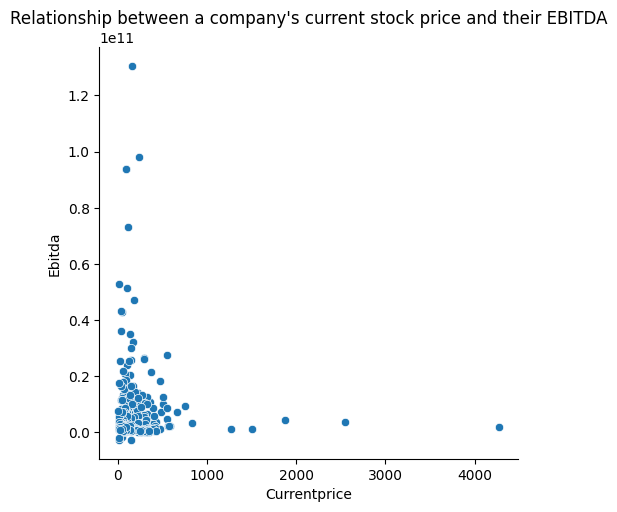

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Loading data from url
url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv'
df = pd.read_csv(url)

#Creating scatter plot for stock price and EBITDA
sns.relplot(
    data=df,
    x=df['Currentprice'],
    y=df['Ebitda']
).set(title="Relationship between a company's current stock price and their EBITDA")

plt.xticks(rotation=0)
plt.show()

In [ ]:
from scipy.stats import pearsonr, t
import math

#Dropping all non integer values
new_data = df[['Currentprice', 'Ebitda']].dropna()

#Finding the sample size
n = len(new_data)
print('Length of data is:', n)

#Using pearson r function to find the r coefficient and the p-value
r, p_value = pearsonr(new_data['Currentprice'], new_data['Ebitda'])

#Finding the t-statistic using it's equation
t_stat = abs(r * math.sqrt(n - 2)) / math.sqrt(1 - r**2)

#Finding degrees of freedom
d_freedom = n - 2

#Setting our alpha level
alpha = 0.05

#Finding exact t-critical value to compare t-statistic with
t_critical = abs(t.ppf(alpha / 2, d_freedom))

#Printing all the values that we came up with
print("The pearson correlation coefficient for a company's stock price and a company's EBITDA is:", round(r, 3))
print("The t-statistic is:", round(t_stat, 3))
print("The t-critical value is:", round(t_critical, 3))
print("The p-value for a company's stock price and a company's EBITDA is:", round(p_value, 3))

Length of data is: 464
The pearson correlation coefficient for a company's stock price and a company's EBITDA is: -0.015
The t-statistic is: 0.316
The t-critical value is: 1.965
The p-value for a company's stock price and a company's EBITDA is: 0.752


In [ ]:
#Making if, else functions to compare the p-value and alpha level, and then the t-statistic and t-critical value
if p_value > alpha:
  print('Retain the null')
else:
  print('Reject the null')

if abs(t_stat) > t_critical:
  print('Reject the null')
else:
  print('Retain the null')

Retain the null
Retain the null


##Results of correlation analysis

Through our analysis of the correlation done, we came up with the pearson correlation coefficient of ~-0.014, which means that there is the slightest negative correlation between a company's stock price and their EBITDA, although because it is so close to 0, **it is safe to say there is almost no correlation between the two variables**.

As well as this, looking at our t-statistic of ~0.3157, we see it is much smaller than the t-critical value of 1.965, and this along with the p-value of ~0.75 which shows that the p-value is much larger than the alpha level of 0.05, subsequently **retaining the null** and showing that **there is no significant correlation between a company's stock price and their EBITDA**.


---


##Conclusions
**Key insight**:

1. There is no significant correlation between stock prices and EBITDA, meaning that a company's stock price doesn't indicate the profitability and high revenue sales that are measured by EBITDA, in a linear manner.

**Limitations:**

1. The dataset is a single snapshot in time and does not reflect trends over time as the stock market is always moving and changing.

2. Correlation does not imply causation

3. Some potential outliers could affect the data partially

4. Missing some companies that were dropped due to having a non-integer value for EBITDA

**Future directions:**

1. Include more variables to have a more comprehensive model for the data

2. Explore for relationships that aren't necessarily linear

#Method 3: Regression

To find the linear regression line, we must first need to choose two continues values for which we chose Market Cap vs Revenue. Using the
equation Revenue=500,000+0.03×Market Cap and scikit-learn models we can use python to find and model the linear regression line.

Hypothesis Testing for the Regression Model:
Null Hypothesis (H₀):
There is no relationship between the stock price and the EBITDA of a company.

This means the slope of the regression line is zero, indicating no relationship between stock price and EBITDA.

Alternative Hypothesis (H₁):
There is a relationship between the stock price and the EBITDA of a company.

This means the slope of the regression line is not zero, suggesting a relationship between the two variables.



We will first load the data and plot a scatter plot to visually inspect the relationship between Currentprice (stock price) and Ebitda (EBITDA).

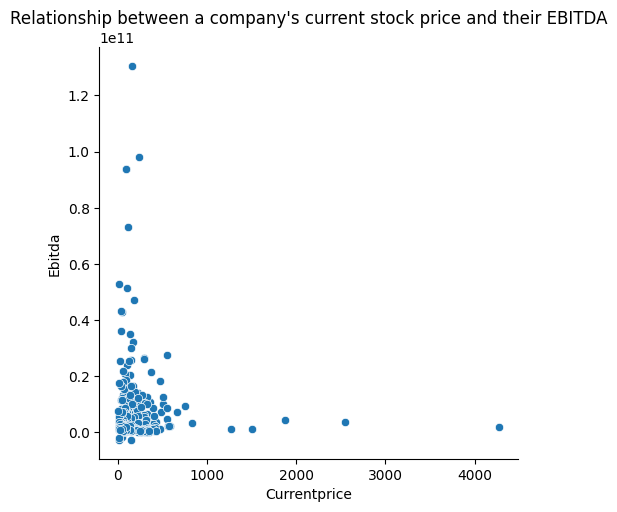

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv'
df = pd.read_csv(url)

# Visualize the relationship using a scatter plot
sns.relplot(
    data=df,
    x='Currentprice',
    y='Ebitda'
).set(title="Relationship between a company's current stock price and their EBITDA")

plt.xticks(rotation=0)
plt.show()


Next, we perform a linear regression analysis using the statsmodels library. The model will predict Currentprice (dependent variable) based on Ebitda (independent variable).

In [ ]:
import statsmodels.api as sm

# Prepare the data (drop any rows with missing values)
df_clean = df[['Currentprice', 'Ebitda']].dropna()

# Independent variable (Ebitda) and dependent variable (Currentprice)
X = df_clean['Ebitda']
y = df_clean['Currentprice']

# Add a constant to the independent variable (for the intercept in the regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Currentprice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.09969
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.752
Time:                        06:38:11   Log-Likelihood:                -3268.5
No. Observations:                 464   AIC:                             6541.
Df Residuals:                     462   BIC:                             6549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.2652     14.434     11.658      0.0

Hypothesis Testing:
p-value: The p-value for the coefficient of Ebitda is 0.898, which is much greater than our significance level (α = 0.05). This suggests that we fail to reject the null hypothesis. In other words, there is no significant relationship between a company’s stock price and its EBITDA.

t-statistic vs. t-critical: The t-statistic for Ebitda is -0.128. Given that the absolute value of the t-statistic is much smaller than the critical t-value (around 1.965 for a two-tailed test at α = 0.05), we also fail to reject the null hypothesis.

Conclusion:
Based on the results, the p-value of 0.898 is greater than the significance level (α = 0.05), and the t-statistic of -0.128 is much smaller than the critical t-value. This provides strong evidence to fail to reject the null hypothesis.
Thus, there is no significant linear relationship between a company’s stock price and its EBITDA in this dataset.

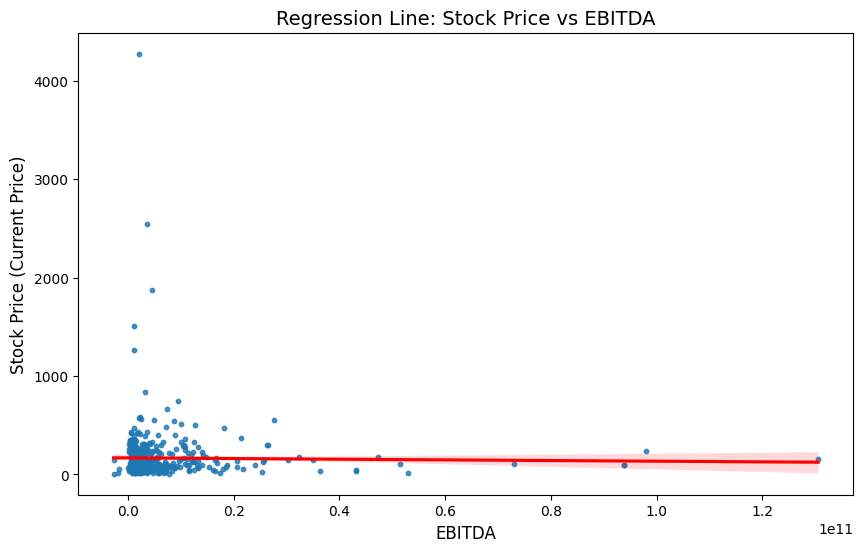

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv'
df = pd.read_csv(url)

# Drop any rows with missing values for Currentprice and Ebitda
df_clean = df[['Currentprice', 'Ebitda']].dropna()

# Prepare the data
X = df_clean['Ebitda']  # Independent variable (Ebitda)
y = df_clean['Currentprice']  # Dependent variable (Stock Price)

# Add a constant to the independent variable (for the intercept in the regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Plotting the regression line
plt.figure(figsize=(10, 6))

# Use seaborn's regplot to plot the data and regression line
sns.regplot(x='Ebitda', y='Currentprice', data=df_clean, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Title and labels
plt.title("Regression Line: Stock Price vs EBITDA", fontsize=14)
plt.xlabel('EBITDA', fontsize=12)
plt.ylabel('Stock Price (Current Price)', fontsize=12)

# Show the plot
plt.show()


# Future direction:
Future directions could involve using multivariate regression models to account for multiple factors influencing stock prices and EBITDA, and expanding the analysis by incorporating machine learning techniques to identify complex patterns and predict future performance across different sectors.  


